In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
data = pd.read_csv("hubble_data.csv", sep=',')
data

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [26]:
#On transforme nos données dans le format adapté à la régression linéaire.
distance = data["distance"].values.reshape(-1, 1)
velocity = data["recession_velocity"].values.reshape(-1, 1)

In [36]:
# Régression linéaire:
regr = linear_model.LinearRegression()
regr.fit(distance, velocity)
velocity_pred = regr.predict(distance)

In [57]:
regr_coef = regr.coef_
mse = mean_squared_error(velocity, velocity_pred)
r2 = r2_score(velocity, velocity_pred)

#Coefficient directeur
print('Coefficient directeur : \n', regr_coef)
# L'erreurquadratique moyenne 
print("MSE : %.2f" % mse)
# Coefficient de détermination
print('R² : %.2f' % r2)

Coefficient directeur : 
 [[454.15844092]]
MSE : 49726.77
R² : 0.62


Text(0.15,0.75,' a = 454.16 \n MSE = 49726.77 \n R² = 0.62')

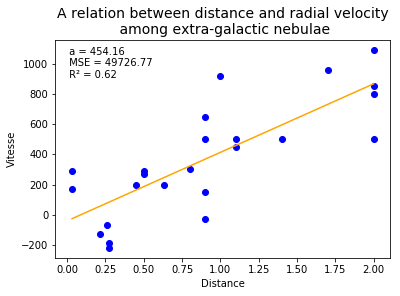

In [73]:
# Grapgiques
fig = plt.figure()
ax = plt.axes()

plt.scatter(distance, velocity, color='blue')
plt.plot(distance, velocity_pred, color='orange')
ax = ax.set(xlabel='Distance', ylabel='Vitesse')
plt.title("A relation between distance and radial velocity\n among extra-galactic nebulae", fontsize=14)
plt.figtext(0.15, 0.75, " a = %.2f \n MSE = %.2f \n R² = %.2f" %(regr_coef, mse, r2), fontsize=10)

